In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
from google.colab import files
uploaded = files.upload()


Saving car_data.zip to car_data.zip


In [3]:
import zipfile
import io
zip_filename = list(uploaded.keys())[0]
with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as zip_ref:
    zip_ref.extractall()


In [4]:
import os
os.listdir()


['.config', 'car_data.zip', 'car data.csv', 'sample_data']

In [5]:
import pandas as pd
df = pd.read_csv('car data.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.info()
# Summary statistics
df.describe()
# Check for missing values
df.isnull().sum()
# Check unique values in categorical columns
print(df['Fuel_Type'].value_counts())
print(df['Selling_type'].value_counts())
print(df['Transmission'].value_counts())
print(df['Owner'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


In [7]:
df.drop(['Car_Name'], axis=1, inplace=True)


In [8]:
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year'], axis=1, inplace=True)


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])


In [10]:
df.head()


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,2,0,1,0,11
1,4.75,9.54,43000,1,0,1,0,12
2,7.25,9.85,6900,2,0,1,0,8
3,2.85,4.15,5200,2,0,1,0,14
4,4.60,6.87,42450,1,0,1,0,11


In [11]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']               # Target variable


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [15]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [16]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# Linear Regression
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
# Random Forest
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Linear Regression R2 Score: 0.8466902419663827
Linear Regression RMSE: 1.8792498207978197
Random Forest R2 Score: 0.9592683769360726
Random Forest RMSE: 0.9686468632776881


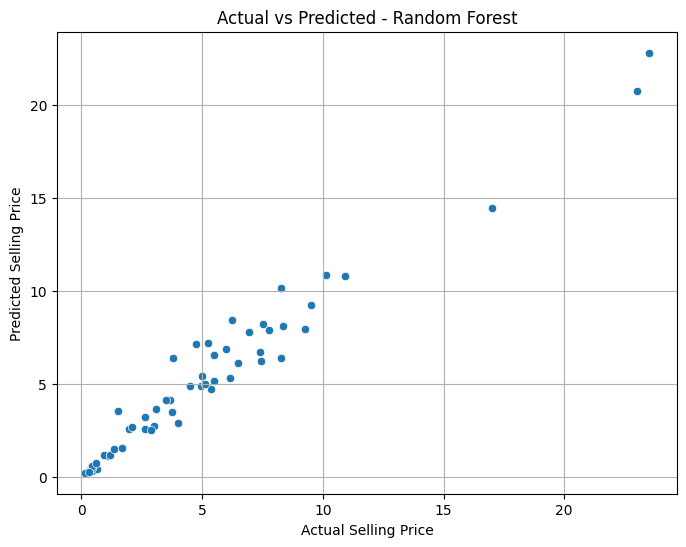

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted - Random Forest")
plt.grid(True)
plt.show()


In [18]:
!pip install gradio


In [19]:
import gradio as gr
import numpy as np
def predict_price(Present_Price, Driven_kms, Fuel_Type, Selling_type, Transmission, Owner, Car_Age):
    input_data = np.array([[Present_Price, Driven_kms, Fuel_Type, Selling_type, Transmission, Owner, Car_Age]])
    prediction = rf_model.predict(input_data)[0]
    return round(prediction, 2)


In [20]:
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Present Price (in lakhs)"),
        gr.Number(label="Driven KMs"),
        gr.Radio(choices=[0, 1, 2], label="Fuel Type (0: CNG, 1: Diesel, 2: Petrol)"),
        gr.Radio(choices=[0, 1], label="Seller Type (0: Dealer, 1: Individual)"),
        gr.Radio(choices=[0, 1], label="Transmission (0: Automatic, 1: Manual)"),
        gr.Radio(choices=[0, 1, 3], label="Owner (0: First Owner, 1: Second Owner, 3: Third Owner)"),
        gr.Number(label="Car Age")
    ],
    outputs="number",
    title="Car Selling Price Predictor",
    description="Enter the car's details to get the predicted selling price (in lakhs)."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f8b8c00c529554c5e0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
